## <font color=blue> Problem Statement</font>
## Consider fashion mnist data available on keras datasets.

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.Design a CNN model which can classify the test set with good accuracy.Link for the data is attached
Note:You need to use hyper parameter tuning  for better result.
Evaluate your model on classification report.

### Liabraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Dropout,Flatten
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,accuracy_score

In [ ]:
pip install keras_tuner


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.3 MB/s eta 0:00:00


In [ ]:
tf.config.experimental.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

# classes :
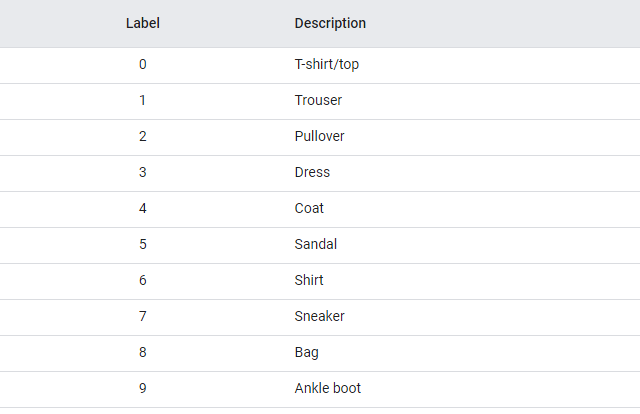

In [ ]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

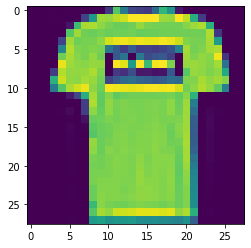

In [ ]:
plt.imshow(x_train[1])

In [ ]:
y_series = pd.Series(y_train)

In [ ]:
classes = list(y_series.unique())

In [ ]:
classes

[9, 0, 3, 2, 7, 5, 1, 6, 4, 8]

In [ ]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
classes[y_train[0]]

'Ankle boot'

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
y_train[0]

9

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train_scaled = x_train/ 255
x_test_scaled = x_test / 255

In [ ]:
x_train_scaled.shape

(60000, 28, 28)

### creating our first basic CNN model

In [ ]:
num_classes = 10
model= Sequential([
    layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32,(3,3),padding="same",activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(num_classes,activation = "sigmoid")
    ])
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
model.fit(x_train_scaled,y_train,epochs=10,validation_data=(x_test_scaled,y_test))


Epoch 1/10


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 18s 5ms/step - loss: 0.4548 - accuracy: 0.8351 - val_loss: 0.3471 - val_accuracy: 0.8755
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3069 - accuracy: 0.8875 - val_loss: 0.2756 - val_accuracy: 0.8994
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2651 - accuracy: 0.9023 - val_loss: 0.2794 - val_accuracy: 0.8956
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2351 - accuracy: 0.9137 - val_loss: 0.2539 - val_accuracy: 0.9070
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2151 - accuracy: 0.9185 - val_loss: 0.2397 - val_accuracy: 0.9145
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1983 - accuracy: 0.9258 - val_loss: 0.2329 - val_accuracy: 0.9116
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1812 - accuracy: 0.9321 - val_loss: 0.2320 - val_accuracy: 0.9136
E

In [ ]:
model.evaluate(x_test_scaled,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2382 - accuracy: 0.9214


[0.23822949826717377, 0.9214000105857849]

### creating model with data_augmentation

In [ ]:
img_height=img_width=28
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(img_height,img_width,1)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0,1),
    ])

In [ ]:
num_classes = 10

model1 = Sequential([
  data_augmentation,
  layers.Conv2D(16, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation="softmax")
])

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model1.fit(x_train_scaled, y_train, epochs=10,validation_data=(x_test_scaled,y_test))    

Epoch 1/10
1875/1875 [==============================] - 41s 21ms/step - loss: 0.9409 - accuracy: 0.6541 - val_loss: 0.6244 - val_accuracy: 0.7713
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.7188 - accuracy: 0.7363 - val_loss: 0.5924 - val_accuracy: 0.7805
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.6508 - accuracy: 0.7612 - val_loss: 0.5910 - val_accuracy: 0.7832
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.6124 - accuracy: 0.7750 - val_loss: 0.4833 - val_accuracy: 0.8243
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.5824 - accuracy: 0.7850 - val_loss: 0.5380 - val_accuracy: 0.8019
Epoch 6/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.5601 - accuracy: 0.7943 - val_loss: 0.4588 - val_accuracy: 0.8336
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.5493 - accuracy: 0.7979 - val_loss: 0.4356 -

In [ ]:
model1.evaluate(x_test_scaled,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5098 - accuracy: 0.8117


[0.5098291635513306, 0.8116999864578247]

In [ ]:
### we can clearly see that by using data augmentation our accuracy decreased to 81.17%

### creating model using hyperparamer tuning and with data_augmentation

In [ ]:
import keras_tuner as kt

In [ ]:
def build_model(hp):
  model = Sequential([
  data_augmentation,
  layers.Conv2D(16, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Dropout(0.2),
  ])
  counter=0
  for i in range(hp.Int("num_layers",min_value=1,max_value=10)):
    if counter==0:
      model.add(Dense(units=hp.Int("units"+str(i),min_value=8,max_value=128,step=8),activation=hp.Choice('Activation'+str(i),values=['relu','tanh','sigmoid'])))
      model.add(Dropout(hp.Choice("dropout"+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))) 
    else:
      model.add(Dense(units=hp.Int("units"+str(i),min_value=8,max_value=128,step=8),activation=hp.Choice('Activation'+str(i),values=['relu','tanh','sigmoid'])))
      model.add(Dropout(hp.Choice("dropout"+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    counter+=1
  model.add(Flatten())
  model.add(Dense(10,activation='sigmoid'))
  optimizer=hp.Choice("optimizer",values=['adam','rmsprop','adadelta','sgd','nadam'])
  model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
  return model


In [ ]:
tuner=kt.RandomSearch(build_model,objective="val_accuracy",max_trials=5,directory="tuning",project_name="Version1")

In [ ]:
tuner.search(x_train_scaled,y_train,epochs=5, validation_data=(x_test_scaled,y_test))

Trial 5 Complete [00h 03m 54s]
val_accuracy: 0.10000000149011612

Best val_accuracy So Far: 0.7552000284194946
Total elapsed time: 00h 18m 42s


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 2,
 'units0': 48,
 'Activation0': 'tanh',
 'dropout0': 0.6,
 'optimizer': 'nadam',
 'units1': 120,
 'Activation1': 'sigmoid',
 'dropout1': 0.4,
 'units2': 40,
 'Activation2': 'relu',
 'dropout2': 0.8,
 'units3': 112,
 'Activation3': 'relu',
 'dropout3': 0.1,
 'units4': 32,
 'Activation4': 'tanh',
 'dropout4': 0.5,
 'units5': 96,
 'Activation5': 'relu',
 'dropout5': 0.8,
 'units6': 104,
 'Activation6': 'sigmoid',
 'dropout6': 0.2,
 'units7': 48,
 'Activation7': 'relu',
 'dropout7': 0.8,
 'units8': 8,
 'Activation8': 'tanh',
 'dropout8': 0.4,
 'units9': 96,
 'Activation9': 'tanh',
 'dropout9': 0.9}

In [ ]:
model2=tuner.get_best_models(num_models=1)[0]

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          1

In [ ]:
model2.fit(x_train_scaled,y_train,epochs=6,initial_epoch=5,validation_data=(x_test_scaled,y_test))

Epoch 6/6
1875/1875 [==============================] - 42s 22ms/step - loss: 0.7522 - accuracy: 0.7277 - val_loss: 0.6286 - val_accuracy: 0.7771


### creating model with hyperparameter tuning without data_augmentation

In [ ]:
def build_model(hp):
  model = Sequential([
  layers.Conv2D(16, (3,3), padding='same', activation='relu',input_shape=(28,28,1)),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Dropout(0.2),
  ])
  counter=0
  for i in range(hp.Int("num_layers",min_value=1,max_value=10)):
    if counter==0:
      model.add(Dense(units=hp.Int("units"+str(i),min_value=8,max_value=128,step=8),activation=hp.Choice('Activation'+str(i),values=['relu','tanh','sigmoid']),input_shape=(28,28,1)))
      model.add(Dropout(hp.Choice("dropout"+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))) 
    else:
      model.add(Dense(units=hp.Int("units"+str(i),min_value=8,max_value=128,step=8),activation=hp.Choice('Activation'+str(i),values=['relu','tanh','sigmoid'])))
      model.add(Dropout(hp.Choice("dropout"+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    counter+=1
  model.add(Flatten())
  model.add(Dense(10,activation='sigmoid'))
  optimizer=hp.Choice("optimizer",values=['adam','rmsprop','adadelta','sgd','nadam'])
  model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
  return model


In [ ]:
tuner=kt.RandomSearch(build_model,objective="val_accuracy",max_trials=2,directory="tuning",project_name="Version3")

In [ ]:
tuner.search(x_train_scaled,y_train,epochs=3, validation_data=(x_test_scaled,y_test))

Trial 2 Complete [00h 00m 42s]
val_accuracy: 0.11379999667406082

Best val_accuracy So Far: 0.11379999667406082
Total elapsed time: 00h 01m 24s


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'units0': 24,
 'Activation0': 'tanh',
 'dropout0': 0.9,
 'optimizer': 'rmsprop',
 'units1': 120,
 'Activation1': 'relu',
 'dropout1': 0.2,
 'units2': 128,
 'Activation2': 'tanh',
 'dropout2': 0.2,
 'units3': 32,
 'Activation3': 'sigmoid',
 'dropout3': 0.1}

In [ ]:
model3=tuner.get_best_models(num_models=1)[0]

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [ ]:
model3.fit(x_train_scaled,y_train,epochs=5,initial_epoch=3,validation_data=(x_test_scaled,y_test))

Epoch 4/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5978 - accuracy: 0.7812 - val_loss: 3.9563 - val_accuracy: 0.1000
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5212 - accuracy: 0.8115 - val_loss: 4.0396 - val_accuracy: 0.1000


In [ ]:
model.evaluate(x_test_scaled,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2382 - accuracy: 0.9214


[0.23822949826717377, 0.9214000105857849]

In [ ]:
y_pred_test=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred_test=[np.argmax(y_pred_test[i]) for i in range(len(y_pred_test))]
y_pred_test = np.array(y_pred_test)

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.51      0.96      0.67      1000
           1       0.92      0.95      0.93      1000
           2       0.53      0.72      0.61      1000
           3       0.85      0.69      0.76      1000
           4       0.47      0.47      0.47      1000
           5       0.48      0.98      0.64      1000
           6       0.40      0.05      0.09      1000
           7       0.46      0.24      0.32      1000
           8       0.97      0.77      0.86      1000
           9       0.99      0.38      0.55      1000

    accuracy                           0.62     10000
   macro avg       0.66      0.62      0.59     10000
weighted avg       0.66      0.62      0.59     10000



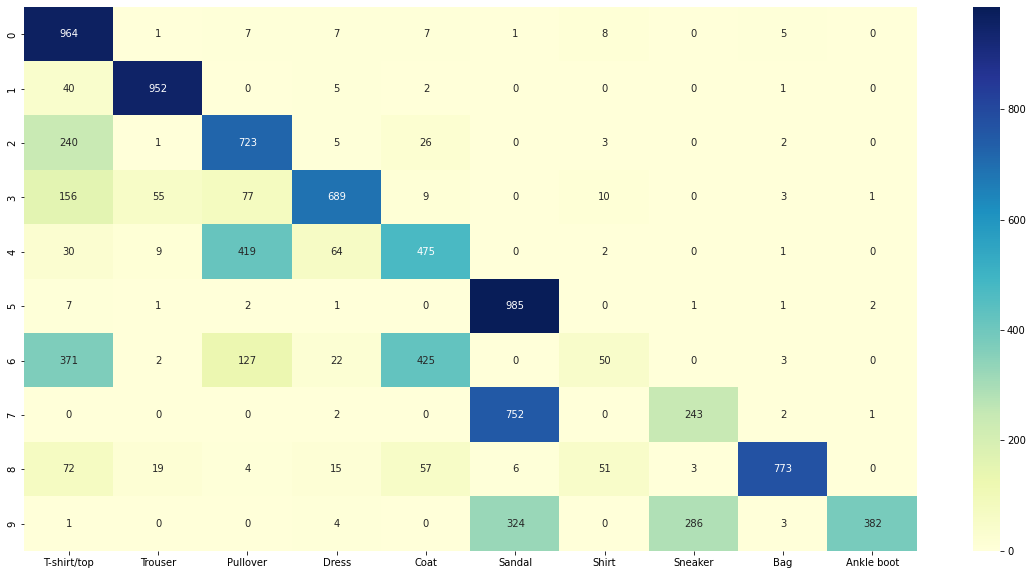

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
conf_matrix = pd.DataFrame(data=cm,columns=classes,index=[i for i in range(len(classes))])
plt.figure(figsize = (20,10))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()